# Importing Libraries

In [1]:
import os

import cv2

import shutil

import numpy as np

import pandas as pd

from glob import glob

import matplotlib.pyplot as plt

import xml.etree.ElementTree as xet

from sklearn.model_selection import train_test_split



import torch

# Checking if cuda is available

print(f'{torch.cuda.is_available() = }') #cuda is helping us in telling that GP is avaialable or not

print(f'{torch.cuda.device_count() = }')

torch.cuda.is_available() = True
torch.cuda.device_count() = 2


In [2]:
#YOLO was introduced by ultralytics so installing it to import YOLO

!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 15.5 MB/s eta 0:00:00a 0:00:01


In [3]:
# it's a package which will give the widgets itself while we r doing the model training for visualization

!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 46.6 MB/s eta 0:00:0000:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbextension-3.6.9
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab_widgets 3.0.11
    Uninstalling jupyterlab_widgets-3.0.11:
      Successfully uninstalled jupyterlab_widgets-3.0.11
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
big

In [4]:
dataset_path = '/kaggle/input/car-plate-detection'

Now we are writing a function which will extract the numbers given in the string present in annotation files inside dataset file.



For example, filename123.txt --> 123






In [5]:
import re



def the_number_in_the_string(filename):

    """

    Extracts the first sequence of digits from the given filename string and returns it as an integer.

    If no digits are found, returns 0.



    Parameters:

    filename (str): The input string to search for digits.



    Returns:

    int: The first sequence of digits found in the input string, or 0 if no digits are found.

    """



    # Search for the first occurrence of one or more digits in the filename

    match = re.search(r'(\d+)', filename)





    if match:

        return int(match.group(0))

    else:

        return 0

In [6]:
print(the_number_in_the_string('file123.txt'))

123


# Formatting the XML file and creating DF

Now, we have xml files, we have to read them, modifications krne pdenge, we want to convert them into text format as well so for that we are creating a function below

In [7]:
labels_dict = dict(img_path = [],

                   xmin = [],

                   xmax = [],

                   ymin = [],

                   ymax = [],

                   img_width = [],

                   img_height = []

)

In [8]:
# we got the file name path by using glob

import os

from glob import glob



# Get the list of XML files from the annotations directory

xml_files = glob(f'{dataset_path}/annotations/*.xml')

In [9]:
# it is used for performing operations on xml files

import xml.etree.ElementTree as xet

In [10]:
import cv2

for filename in sorted(xml_files, key = the_number_in_the_string): # here key is used to give in which manner the files will be sorted

    # print(filename) # now the file is stored here in sorted format

    info = xet.parse(filename) # Parsing the XML file

    root = info.getroot()

    # print(info) # now the xml file is parsed and stored as object

    # print(root) # root contains the annotation file text



    # Now we can fetch text from the 'annotation' file stored in car dataset folder



    # now we have to find the object and bndbox tag stored in annotation file

    member_object = root.find('object')

    labels_info = member_object.find('bndbox')

    # print(member_object, labels_info)



    # Now we want to extract the variables like xmin, ymin, xmax, ymax or Find the 'object' element in the XML and extract bounding box information

    xmin = int(labels_info.find('xmin').text)

    xmax = int(labels_info.find('xmax').text)

    ymin = int(labels_info.find('ymin').text)

    ymax = int(labels_info.find('ymax').text)



    # putting all the values in the dataframe or Get the image filename and construct the full path to the image

    img_name = root.find('filename').text

    img_path = os.path.join(dataset_path, 'images', img_name)

    # print(img_name, img_path)



    # Read the image to get its dimensions

    height, width, _ = cv2.imread(img_path).shape #here we will be having RGB(3rd) values hence to be stored in 3 values

    # print(height, width)



    labels_dict['img_path'].append(img_path)

    labels_dict['xmin'].append(xmin)

    labels_dict['xmax'].append(xmax)

    labels_dict['ymin'].append(ymin)

    labels_dict['ymax'].append(ymax)

    labels_dict['img_width'].append(width)

    labels_dict['img_height'].append(height)



    # print(labels_dict)



    # break # helping us in getting one value, not running on all over dataset

Storing all the data in form of DataFrame or Convert the dictionary to a pandas DataFrame

In [11]:
alldata = pd.DataFrame(labels_dict)

alldata

,img_path,xmin,xmax,ymin,ymax,img_width,img_height
0,/kaggle/input/car-plate-detection/images/Cars0...,226,419,125,173,500,268
1,/kaggle/input/car-plate-detection/images/Cars1...,134,262,128,160,400,248
2,/kaggle/input/car-plate-detection/images/Cars2...,229,270,176,193,400,400
3,/kaggle/input/car-plate-detection/images/Cars3...,142,261,128,157,400,225
4,/kaggle/input/car-plate-detection/images/Cars4...,156,503,82,253,590,350
...,...,...,...,...,...,...,...
428,/kaggle/input/car-plate-detection/images/Cars4...,142,258,128,157,400,225
429,/kaggle/input/car-plate-detection/images/Cars4...,86,208,166,195,301,400
430,/kaggle/input/car-plate-detection/images/Cars4...,38,116,159,197,400,225
431,/kaggle/input/car-plate-detection/images/Cars4...,55,343,82,147,400,192


# Train test splitting

In [12]:
from sklearn.model_selection import train_test_split



# train, val and test splitting



# Split the data into training and test sets

# Use 10% of the data for the test set

train, test = train_test_split(alldata, test_size = 1/10, random_state = 42)



# Split the training data further into training and validation sets

# Use 8/9 of the remaining data for the training set, resulting in an 80/10/10 split overall

train, val = train_test_split(train, train_size = 8/9, random_state = 42)



# Print the number of samples in each set

print(f'''

    len(train) = {len(train)}

    len(val) = {len(val)}

    len(test) = {len(test)}

''')






    len(train) = 345

    len(val) = 44

    len(test) = 44




In [13]:
# Remove the 'datasets' directory if it exists

if os.path.exists('datasets'):

    shutil.rmtree('datasets')

In [14]:
train

,img_path,xmin,xmax,ymin,ymax,img_width,img_height
124,/kaggle/input/car-plate-detection/images/Cars1...,305,320,256,267,400,267
315,/kaggle/input/car-plate-detection/images/Cars3...,12,385,98,181,400,300
282,/kaggle/input/car-plate-detection/images/Cars2...,37,319,145,203,350,263
236,/kaggle/input/car-plate-detection/images/Cars2...,223,250,106,119,400,176
112,/kaggle/input/car-plate-detection/images/Cars1...,49,164,135,191,240,400
...,...,...,...,...,...,...,...
110,/kaggle/input/car-plate-detection/images/Cars1...,286,328,133,159,400,267
255,/kaggle/input/car-plate-detection/images/Cars2...,116,273,156,188,400,267
292,/kaggle/input/car-plate-detection/images/Cars2...,91,137,187,208,400,267
54,/kaggle/input/car-plate-detection/images/Cars5...,148,257,61,118,400,300


Now we want to change variables like xmin, ymin, xmax, ymax, img_width, img_height for YOLO and convert the data into text file




In [15]:
def make_split_folder_in_yolo_format(split_name, split_df):

    """

    Creates a folder structure for a dataset split (train/val/test) in YOLO format.

    Parameters:

    split_name (str): The name of the split (e.g., 'train', 'val', 'test').

    split_df (pd.DataFrame): The DataFrame containing the data for the split.

    The function will create 'labels' and 'images' subdirectories under 'datasets/cars_license_plate/{split_name}',

    and save the corresponding labels and images in YOLO format.

    """

    labels_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'labels')

    images_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'images')



    # creating directories

    os.makedirs(labels_path, exist_ok = True)

    os.makedirs(images_path, exist_ok = True)



    # now we are converting these variable values into YOLO format

    for _, row in split_df.iterrows():

        # we are getting the car name and its extension

        img_name, img_extension = os.path.splitext(os.path.basename(row['img_path']))



        # Calculate YOLO format bounding box coordinates

        x_center = (row['xmin'] + row['xmax'])/2/row['img_width'] # /row_width is done to normalize the value that we have learnt earlier

        y_center = (row['ymin'] + row['ymax'])/2/row['img_height']

        width = (row['xmax'] - row['xmin'])/row['img_width']

        height = (row['ymax'] - row['ymin'])/row['img_height']



        # saving these values in text format

        label_path = os.path.join(labels_path, f'{img_name}.txt') # img_name is name of the text file

        with open(label_path, 'w') as file:

            file.write(f"0 {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}\n") # writing all the variables


        # Copy the image to the images directory
        shutil.copy(row['img_path'], os.path.join(images_path, img_name + img_extension))



    print(f"Created '{images_path}' and '{labels_path}'")


In [16]:
# Calling the above function for training dataset
# Create YOLO format folders for train, validation, and test splits
make_split_folder_in_yolo_format("train", train)

make_split_folder_in_yolo_format("val", val)

make_split_folder_in_yolo_format("test", test)


Created 'datasets/cars_license_plate_new/train/images' and 'datasets/cars_license_plate_new/train/labels'
Created 'datasets/cars_license_plate_new/val/images' and 'datasets/cars_license_plate_new/val/labels'
Created 'datasets/cars_license_plate_new/test/images' and 'datasets/cars_license_plate_new/test/labels'


#Creating a YAML file


In [17]:
# yaml file will define the structure, we want to let know the model that this structure contains our model



# Define the content of the datasets.yaml file

datasets_yaml = '''

path: cars_license_plate_new



train: train/images

val: val/images

test: test/images



# number of classes

nc: 1

# class names

names: ['license_plate']

'''



# Write the content to the datasets.yaml file

with open('datasets.yaml', 'w') as file:

    file.write(datasets_yaml)




In [18]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 82.3MB/s]


In [19]:
model.train(

    data='datasets.yaml',  # Path to the dataset configuration file

    epochs=100,            # Number of training epochs

    batch=16,              # Batch size

    device='cuda',         # Use GPU for training

    imgsz=320,             # Image size (width and height) for training

    cache=True             # Cache images for faster training

)

Ultralytics 8.3.36 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=True, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

100%|██████████| 755k/755k [00:00<00:00, 4.29MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/cars_license_plate_new/train/labels... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<00:00, 397.70it/s]

train: New cache created: /kaggle/working/datasets/cars_license_plate_new/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.1GB RAM): 100%|██████████| 345/345 [00:01<00:00, 179.48it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/cars_license_plate_new/val/labels... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<00:00, 459.27it/s]

val: New cache created: /kaggle/working/datasets/cars_license_plate_new/val/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 44/44 [00:00<00:00, 191.89it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.644G      1.755      2.943      1.354         17        320: 100%|██████████| 22/22 [00:03<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         44         44    0.00355      0.932      0.581      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.612G      1.558      1.558      1.149         18        320: 100%|██████████| 22/22 [00:02<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.65it/s]

                   all         44         44    0.00468      0.909      0.105     0.0493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.623G      1.547      1.416      1.153         17        320: 100%|██████████| 22/22 [00:01<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.45it/s]

                   all         44         44      0.897      0.199      0.513       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.617G      1.459      1.287      1.144         18        320: 100%|██████████| 22/22 [00:01<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all         44         44      0.774      0.623      0.656      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.617G      1.551        1.3      1.163         17        320: 100%|██████████| 22/22 [00:01<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]

                   all         44         44      0.738      0.727      0.707      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.617G      1.453      1.207      1.121         14        320: 100%|██████████| 22/22 [00:02<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.40it/s]

                   all         44         44      0.871      0.773      0.806      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.617G      1.373      1.074      1.114         18        320: 100%|██████████| 22/22 [00:01<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all         44         44      0.703      0.808       0.78      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.617G      1.474      1.139      1.194         24        320: 100%|██████████| 22/22 [00:01<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.66it/s]

                   all         44         44      0.813      0.727      0.749      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.617G      1.385      1.016      1.203         16        320: 100%|██████████| 22/22 [00:01<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.57it/s]

                   all         44         44      0.722      0.827       0.81      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.617G      1.391     0.9993      1.172         16        320: 100%|██████████| 22/22 [00:02<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.29it/s]

                   all         44         44       0.78      0.705      0.795      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.617G      1.399      1.027      1.156         15        320: 100%|██████████| 22/22 [00:01<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all         44         44      0.946      0.818      0.868       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.617G      1.372     0.9886      1.109         13        320: 100%|██████████| 22/22 [00:02<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.34it/s]

                   all         44         44      0.814      0.796      0.776      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.614G      1.326     0.9464      1.095         13        320: 100%|██████████| 22/22 [00:01<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         44         44      0.855      0.864      0.864      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.617G      1.315     0.8911      1.102         21        320: 100%|██████████| 22/22 [00:01<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.27it/s]

                   all         44         44      0.877      0.841      0.894      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.617G      1.318     0.9017      1.112         17        320: 100%|██████████| 22/22 [00:01<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.41it/s]

                   all         44         44      0.852      0.783      0.859      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.617G      1.291     0.8473       1.11         18        320: 100%|██████████| 22/22 [00:01<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]

                   all         44         44      0.878      0.818      0.864      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.617G      1.317     0.8573      1.114         16        320: 100%|██████████| 22/22 [00:01<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.76it/s]

                   all         44         44      0.827      0.773      0.778      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.617G      1.331     0.8583      1.129         16        320: 100%|██████████| 22/22 [00:01<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.62it/s]

                   all         44         44      0.839      0.831      0.857      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.614G      1.252     0.8196       1.08         14        320: 100%|██████████| 22/22 [00:01<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         44         44      0.884      0.862      0.854       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.617G      1.236     0.7925      1.074         21        320: 100%|██████████| 22/22 [00:01<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.22it/s]

                   all         44         44      0.863      0.909      0.913      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.617G      1.247     0.8007      1.072         14        320: 100%|██████████| 22/22 [00:02<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.83it/s]

                   all         44         44      0.972      0.795      0.923      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.617G       1.24      0.806      1.077         17        320: 100%|██████████| 22/22 [00:01<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.60it/s]

                   all         44         44      0.897      0.773      0.872      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.614G      1.201     0.7938      1.072         20        320: 100%|██████████| 22/22 [00:01<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all         44         44      0.895      0.818      0.864      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.617G      1.208     0.7723      1.068         14        320: 100%|██████████| 22/22 [00:02<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.91it/s]


                   all         44         44       0.87      0.818      0.841      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.617G      1.184     0.7689      1.055         15        320: 100%|██████████| 22/22 [00:01<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.04it/s]


                   all         44         44      0.904      0.855      0.883      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.617G      1.212     0.7776      1.065         16        320: 100%|██████████| 22/22 [00:02<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]

                   all         44         44      0.908      0.795      0.899      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.617G      1.183      0.729      1.063         16        320: 100%|██████████| 22/22 [00:01<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.99it/s]

                   all         44         44      0.973      0.818      0.908      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.617G      1.198     0.7325      1.049         19        320: 100%|██████████| 22/22 [00:01<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.84it/s]


                   all         44         44       0.89      0.795      0.859      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.617G      1.146     0.7389      1.023         15        320: 100%|██████████| 22/22 [00:01<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.52it/s]

                   all         44         44      0.944      0.773      0.896      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.614G      1.142     0.7258      1.041         11        320: 100%|██████████| 22/22 [00:01<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.30it/s]

                   all         44         44      0.862      0.851      0.914      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.614G      1.095     0.7164      1.056         11        320: 100%|██████████| 22/22 [00:01<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.75it/s]

                   all         44         44      0.919      0.818      0.882      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.614G       1.12     0.6872      1.037         13        320: 100%|██████████| 22/22 [00:02<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.00it/s]

                   all         44         44       0.84      0.841      0.867      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.617G      1.129     0.6955      1.009         15        320: 100%|██████████| 22/22 [00:01<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.93it/s]

                   all         44         44      0.917      0.841      0.852      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.617G      1.129     0.7211      1.032         19        320: 100%|██████████| 22/22 [00:02<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]

                   all         44         44      0.847      0.883      0.895      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.617G      1.126     0.6816      1.027         17        320: 100%|██████████| 22/22 [00:01<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.51it/s]

                   all         44         44       0.88      0.841      0.868      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.617G      1.018     0.6532     0.9674         16        320: 100%|██████████| 22/22 [00:01<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.05it/s]


                   all         44         44      0.902      0.838      0.891      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.617G      1.087     0.6595      1.011         17        320: 100%|██████████| 22/22 [00:01<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.51it/s]

                   all         44         44      0.947      0.814      0.906      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.617G      1.048     0.6504      1.002         14        320: 100%|██████████| 22/22 [00:01<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.29it/s]

                   all         44         44      0.947      0.815      0.877      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.617G      1.046     0.6566      1.011         14        320: 100%|██████████| 22/22 [00:01<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.44it/s]

                   all         44         44      0.897      0.791      0.875      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.617G      1.024     0.6442     0.9833         20        320: 100%|██████████| 22/22 [00:01<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.22it/s]

                   all         44         44      0.939      0.818      0.889      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.617G      1.067     0.6454      1.009         18        320: 100%|██████████| 22/22 [00:02<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.96it/s]

                   all         44         44        0.9      0.841      0.911      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.614G      1.059     0.6587      1.004          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         44         44      0.922      0.811      0.877      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.614G      1.036     0.6392     0.9904         14        320: 100%|██████████| 22/22 [00:02<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.53it/s]

                   all         44         44      0.813      0.909      0.897      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.617G      1.043     0.6498          1         16        320: 100%|██████████| 22/22 [00:02<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]

                   all         44         44      0.826      0.841      0.895      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.614G      1.013      0.634      1.004         10        320: 100%|██████████| 22/22 [00:01<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.38it/s]

                   all         44         44      0.856      0.812      0.878      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.617G      1.057     0.6288      1.013         17        320: 100%|██████████| 22/22 [00:01<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]


                   all         44         44      0.886       0.88      0.883      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.617G     0.9961     0.6148      0.983         18        320: 100%|██████████| 22/22 [00:01<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]

                   all         44         44      0.896      0.841      0.877      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.614G     0.9969     0.6053     0.9887         15        320: 100%|██████████| 22/22 [00:02<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.25it/s]

                   all         44         44      0.856      0.841      0.874      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.614G      1.024     0.6077     0.9837         14        320: 100%|██████████| 22/22 [00:01<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.83it/s]

                   all         44         44      0.811      0.886      0.869      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.617G      0.958     0.5982      0.972         15        320: 100%|██████████| 22/22 [00:01<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.38it/s]

                   all         44         44      0.859      0.864      0.882      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.617G     0.9699     0.5882     0.9657         14        320: 100%|██████████| 22/22 [00:01<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.92it/s]

                   all         44         44      0.944      0.767      0.865      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.617G     0.9601     0.5835     0.9681         24        320: 100%|██████████| 22/22 [00:01<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.54it/s]

                   all         44         44      0.921      0.797       0.87      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.617G     0.9554     0.5825     0.9688         20        320: 100%|██████████| 22/22 [00:01<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]

                   all         44         44      0.932      0.795      0.867        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.617G     0.9783     0.5685     0.9551         21        320: 100%|██████████| 22/22 [00:01<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.72it/s]

                   all         44         44      0.903      0.846      0.914      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.617G     0.9123     0.5599     0.9482         14        320: 100%|██████████| 22/22 [00:02<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]


                   all         44         44       0.99      0.818      0.913       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.617G     0.9549     0.5748     0.9621         20        320: 100%|██████████| 22/22 [00:02<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.36it/s]

                   all         44         44        0.9       0.82      0.885      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.617G     0.9162      0.575     0.9566         19        320: 100%|██████████| 22/22 [00:01<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.74it/s]

                   all         44         44      0.848      0.909      0.898      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.617G     0.9225     0.5722     0.9634         20        320: 100%|██████████| 22/22 [00:01<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all         44         44      0.888      0.841      0.895      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.617G     0.9394      0.588     0.9618         18        320: 100%|██████████| 22/22 [00:01<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.62it/s]

                   all         44         44      0.917      0.795      0.885      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.617G     0.9387      0.573     0.9693         22        320: 100%|██████████| 22/22 [00:01<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.53it/s]

                   all         44         44      0.921      0.791      0.887      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.617G      1.016     0.5871      0.974         13        320: 100%|██████████| 22/22 [00:01<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.37it/s]


                   all         44         44      0.955      0.795      0.897      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.617G     0.9799     0.5888     0.9701         16        320: 100%|██████████| 22/22 [00:01<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all         44         44      0.924      0.818      0.915      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.617G     0.9662     0.5781     0.9449         18        320: 100%|██████████| 22/22 [00:01<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.54it/s]

                   all         44         44      0.922      0.812      0.906       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.617G     0.9573      0.573     0.9653         20        320: 100%|██████████| 22/22 [00:01<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.30it/s]

                   all         44         44        0.9      0.814      0.907      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.617G      0.907     0.5498     0.9434         15        320: 100%|██████████| 22/22 [00:01<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.29it/s]

                   all         44         44      0.919      0.909      0.931      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.617G     0.9068     0.5431     0.9551         19        320: 100%|██████████| 22/22 [00:02<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         44         44      0.891      0.864        0.9       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.617G     0.9102     0.5529     0.9658         14        320: 100%|██████████| 22/22 [00:01<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.78it/s]

                   all         44         44      0.862      0.886      0.893      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.617G      0.867     0.5374     0.9406         12        320: 100%|██████████| 22/22 [00:01<00:00, 12.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.06it/s]

                   all         44         44      0.925      0.841      0.917       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.617G     0.8614     0.5136     0.9399         23        320: 100%|██████████| 22/22 [00:01<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.79it/s]

                   all         44         44      0.907      0.885      0.905      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.617G     0.8318     0.5152      0.933         21        320: 100%|██████████| 22/22 [00:01<00:00, 12.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.90it/s]


                   all         44         44      0.866       0.88      0.923      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.617G     0.8666     0.5136     0.9309         20        320: 100%|██████████| 22/22 [00:01<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.48it/s]

                   all         44         44      0.925      0.795      0.897      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.617G      0.841      0.512      0.941         20        320: 100%|██████████| 22/22 [00:01<00:00, 12.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.12it/s]

                   all         44         44      0.913      0.818      0.894      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.617G     0.8564     0.5092     0.9415         15        320: 100%|██████████| 22/22 [00:01<00:00, 12.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.37it/s]

                   all         44         44      0.904      0.818      0.872      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.617G     0.8319      0.525     0.9245         19        320: 100%|██████████| 22/22 [00:01<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.26it/s]

                   all         44         44       0.91      0.818      0.916       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.614G     0.8503     0.5162     0.9303         13        320: 100%|██████████| 22/22 [00:01<00:00, 12.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.92it/s]

                   all         44         44      0.866      0.818       0.88      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.614G     0.8372     0.4974     0.9331         26        320: 100%|██████████| 22/22 [00:01<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.62it/s]

                   all         44         44      0.923      0.795      0.862      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.614G     0.8692      0.509     0.9477         12        320: 100%|██████████| 22/22 [00:01<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.54it/s]

                   all         44         44      0.927      0.795      0.879      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.617G     0.7975     0.4865     0.9189         14        320: 100%|██████████| 22/22 [00:02<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]

                   all         44         44      0.919      0.818      0.886      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.617G     0.8226     0.4787     0.9225         19        320: 100%|██████████| 22/22 [00:01<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.36it/s]

                   all         44         44      0.923      0.818      0.894      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.617G     0.8266     0.4982     0.9252         23        320: 100%|██████████| 22/22 [00:01<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.97it/s]


                   all         44         44      0.973      0.814        0.9      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.617G     0.7898     0.4869     0.9208         16        320: 100%|██████████| 22/22 [00:01<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.81it/s]

                   all         44         44      0.924      0.832      0.897      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.617G     0.8146     0.4897     0.9199         18        320: 100%|██████████| 22/22 [00:02<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.61it/s]

                   all         44         44      0.925      0.838        0.9      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.617G      0.827     0.4908     0.9278         16        320: 100%|██████████| 22/22 [00:01<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.52it/s]

                   all         44         44      0.924      0.834      0.897      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.617G      0.831     0.4995     0.9212         19        320: 100%|██████████| 22/22 [00:01<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.15it/s]

                   all         44         44      0.902      0.838      0.894      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.617G     0.7846     0.4744     0.9263         22        320: 100%|██████████| 22/22 [00:01<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.06it/s]


                   all         44         44      0.865      0.874      0.893      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.617G     0.7883      0.465     0.9064         18        320: 100%|██████████| 22/22 [00:02<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]

                   all         44         44      0.879      0.841      0.899      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.617G     0.7672      0.475     0.9069         18        320: 100%|██████████| 22/22 [00:01<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all         44         44      0.901      0.826      0.904      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.617G     0.7424     0.4555     0.9052         17        320: 100%|██████████| 22/22 [00:02<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.63it/s]

                   all         44         44      0.847      0.886      0.905      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.614G     0.7732     0.4679     0.9166         13        320: 100%|██████████| 22/22 [00:01<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.85it/s]


                   all         44         44      0.861      0.886      0.905      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.617G     0.7575       0.47     0.9203         15        320: 100%|██████████| 22/22 [00:02<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.81it/s]

                   all         44         44      0.948      0.834      0.907      0.543


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.614G      1.024     0.5575       1.02          9        320: 100%|██████████| 22/22 [00:02<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.62it/s]

                   all         44         44      0.886      0.909      0.926      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.617G     0.9841     0.5195      1.009          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]

                   all         44         44      0.902      0.886      0.913      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.614G     0.9718     0.5252      1.008          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.46it/s]

                   all         44         44      0.907      0.885      0.909      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.617G      0.945     0.4987     0.9932          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]

                   all         44         44      0.921      0.864      0.902      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.614G     0.9758     0.4897      1.009          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.47it/s]

                   all         44         44      0.907      0.841      0.899      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.614G       0.94     0.5033      1.005          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.78it/s]

                   all         44         44      0.924      0.833      0.897      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.614G     0.9417     0.4921     0.9812          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]

                   all         44         44      0.864      0.863      0.897      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.614G     0.9442     0.4929     0.9616          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.43it/s]

                   all         44         44      0.923      0.813      0.897      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.614G     0.9369     0.4952      0.989          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.67it/s]

                   all         44         44      0.916      0.818      0.897      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.614G     0.9258     0.4899      0.983          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.81it/s]

                   all         44         44        0.9      0.821      0.896      0.536



100 epochs completed in 0.080 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]


                   all         44         44      0.907      0.885      0.909      0.555
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x787c2c3650c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Predicting the images


In [20]:
# Finding the most recent training log directory
log_dir = max(glob('runs/detect/train*'), key = the_number_in_the_string)

# Load the training results from the CSV file
results = pd.read_csv(os.path.join(log_dir, 'results.csv'))
results

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,9.13795,1.75533,2.94342,1.35362,0.00355,0.93182,0.58079,0.23900,1.67244,2.90175,1.18387,0.000420,0.000420,0.000420
1,2,12.32510,1.55845,1.55829,1.14870,0.00468,0.90909,0.10475,0.04933,1.67460,3.21013,1.21626,0.000851,0.000851,0.000851
2,3,15.13480,1.54726,1.41639,1.15257,0.89727,0.19897,0.51286,0.25004,1.76326,2.75384,1.26630,0.001274,0.001274,0.001274
3,4,17.95060,1.45937,1.28672,1.14357,0.77397,0.62274,0.65642,0.30423,1.84409,2.16579,1.55773,0.001688,0.001688,0.001688
4,5,20.87920,1.55053,1.29999,1.16302,0.73758,0.72727,0.70686,0.38103,1.68573,1.70600,1.33906,0.001921,0.001921,0.001921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,274.82300,0.93997,0.50332,1.00498,0.92433,0.83300,0.89671,0.52440,1.47731,0.64306,1.25601,0.000119,0.000119,0.000119
96,97,277.45900,0.94170,0.49208,0.98121,0.86352,0.86283,0.89730,0.53275,1.48479,0.64104,1.25719,0.000099,0.000099,0.000099
97,98,280.16400,0.94423,0.49289,0.96160,0.92261,0.81289,0.89672,0.53230,1.49064,0.64598,1.25794,0.000079,0.000079,0.000079
98,99,282.96500,0.93686,0.49519,0.98902,0.91590,0.81818,0.89732,0.53507,1.48768,0.65291,1.24901,0.000060,0.000060,0.000060


In [21]:
# Remove any leading/trailing whitespace from column names
results.columns = results.columns.str.strip()

# Extract epochs and accuracy metrics
epochs = results.index + 1
print(epochs)

RangeIndex(start=1, stop=101, step=1)


In [22]:
results.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

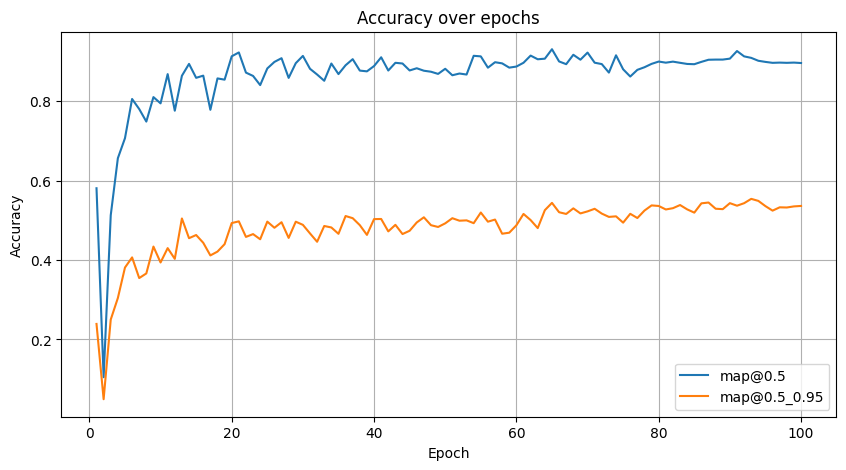

In [23]:
# Mean Average Precision at IoU=0.5
map_0_5 = results['metrics/mAP50(B)']
# Mean Average Precision at IoU=0.5:0.95
map_0_5_0_95 = results['metrics/mAP50-95(B)']

# Plot the accuracy over epochs
plt.figure(figsize = (10,5))
plt.plot(epochs, map_0_5, label = 'map@0.5')
plt.plot(epochs, map_0_5_0_95, label = 'map@0.5_0.95')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Saving model
model.save("License_plate_model.pt")
# we have already a pt file saved in /kaggle/working/runs/detect/train/weights/best.pt and we can also save the file separately as we are doing now

In [25]:
# Finding prediction
results = model.predict('/kaggle/working/datasets/cars_license_plate_new/train/images/Cars107.png')


image 1/1 /kaggle/working/datasets/cars_license_plate_new/train/images/Cars107.png: 192x320 1 license_plate, 45.5ms
Speed: 1.0ms preprocess, 45.5ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 320)


In [26]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'license_plate'}
 obb: None
 orig_img: array([[[ 94, 114, 132],
         [ 87, 107, 125],
         [ 70,  90, 108],
         ...,
         [139, 156, 172],
         [135, 152, 168],
         [138, 155, 171]],
 
        [[ 79,  99, 117],
         [ 90, 110, 128],
         [ 90, 110, 128],
         ...,
         [118, 135, 151],
         [116, 133, 149],
         [117, 134, 150]],
 
        [[ 90, 110, 128],
         [ 96, 116, 134],
         [ 91, 111, 129],
         ...,
         [117, 134, 150],
         [117, 134, 150],
         [117, 134, 150]],
 
        ...,
 
        [[100, 115, 124],
         [100, 115, 124],
         [ 99, 114, 123],
         ...,
         [ 71,  80,  90],
         [ 74,  83,  93],
         [ 71,  80,  90]],
 
        [[102, 117, 126],
         [101, 116, 125],
         [ 99, 114, 123],
         ...,
         [ 

In [27]:
# Converting image into black and white
image = cv2.imread('/kaggle/working/datasets/cars_license_plate_new/train/images/Cars124.png')
results = model.predict('/kaggle/working/datasets/cars_license_plate_new/train/images/Cars124.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


image 1/1 /kaggle/working/datasets/cars_license_plate_new/train/images/Cars124.png: 224x320 2 license_plates, 43.9ms
Speed: 1.0ms preprocess, 43.9ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 320)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.4681], device='cuda:0')
data: tensor([[175.0208, 234.1248, 197.0976, 245.4641,   0.4681,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (267, 400)
shape: torch.Size([1, 6])
xywh: tensor([[186.0592, 239.7945,  22.0769,  11.3392]], device='cuda:0')
xywhn: tensor([[0.4651, 0.8981, 0.0552, 0.0425]], device='cuda:0')
xyxy: tensor([[175.0208, 234.1248, 197.0976, 245.4641]], device='cuda:0')
xyxyn: tensor([[0.4376, 0.8769, 0.4927, 0.9193]], device='cuda:0')
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.3439], device='cuda:0')
data: tensor([[302.7707, 254.8017, 320.0856, 266.5103,   0.3439,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (267, 400)
shape: torch.Size([1, 6])
xywh: tensor([[311.4281, 260.6560,  17.3149,  11.7086]], device='cuda:0')
xywhn: tensor([[0.7786, 0.9762, 0.0433, 0.

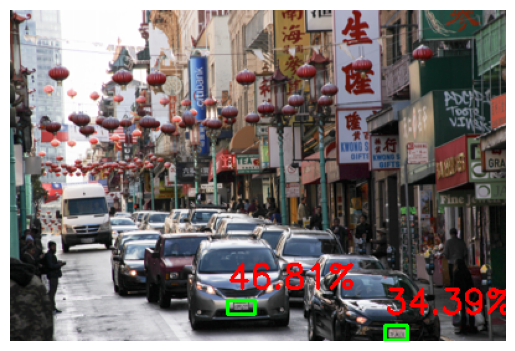

In [28]:
for result in results:
    for box in result.boxes:
        print(box)
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        confidence = box.conf[0]

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
plt.imshow(image)
plt.axis('off')
plt.show()


# Prediction task completed
Prediction is completed using YOLO v8

Now we can to convert the number plate into text format as well using package called pytesseract OCR internally, not going too much internally

In [29]:
 !pip install pytesseract

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [30]:
import pytesseract
from pytesseract import Output


image 1/1 /kaggle/working/datasets/cars_license_plate_new/train/images/Cars118.png: 224x320 1 license_plate, 10.1ms
Speed: 2.8ms preprocess, 10.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 320)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8772], device='cuda:0')
data: tensor([[198.6790, 165.5688, 394.5187, 217.1900,   0.8772,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (375, 600)
shape: torch.Size([1, 6])
xywh: tensor([[296.5989, 191.3794, 195.8397,  51.6212]], device='cuda:0')
xywhn: tensor([[0.4943, 0.5103, 0.3264, 0.1377]], device='cuda:0')
xyxy: tensor([[198.6790, 165.5688, 394.5187, 217.1900]], device='cuda:0')
xyxyn: tensor([[0.3311, 0.4415, 0.6575, 0.5792]], device='cuda:0')
Detected License Plate Number: JAG2 UAR



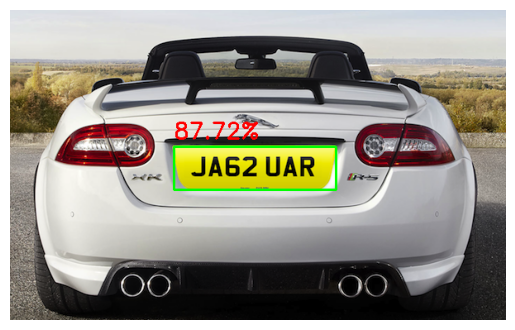

In [31]:
image = cv2.imread('/kaggle/working/datasets/cars_license_plate_new/train/images/Cars118.png')
results = model.predict('/kaggle/working/datasets/cars_license_plate_new/train/images/Cars118.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for result in results:
    for box in result.boxes:
        print(box)
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        confidence = box.conf[0]

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # now we want to extract the region of interest or cropping the image using the coordinates value
        roi = image[y1:y2, x1:x2]

        text = pytesseract.image_to_string(roi, config = '--psm 6') #here config is model config
        print(f"Detected License Plate Number: {text}")

plt.imshow(image)
plt.axis('off')
plt.show()